In [1]:
%%html
<img src='Flag/flag.jpg'>

# Belarus statistics and comparison

## Point of compare/argue: how far away Belarus is in economy field among other countries from the moment of USSR collapse ?
Countries were chosen from a pool of former USSR(15 countries), including Belarus itself. 
In several plots, World and European Union averages were also compared.
All data was collected from open sources : 

* https://data.worldbank.org/;
* https://www.transparency.org/en/cpi;
* https://www.kaggle.com/unsdsn/world-happiness

and reshaped.

In [2]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Importing 16(14+2) .csv tables: (1) GDP, (2) GDP per capita, (3.1) GDP PPP, (3.2) GDP PPP per employed, (4) GINI, (5) Foreign Exchange Reserves, (6) Inflation Rate, (7) Corruption perception index, (8) Unemployment, (9) Life length, (10) Life Expectancy at birth, (11) Population, (12) Doing Business Index, (13.1) Arms exports, (13.2) Arms imports and (14) World Happiness index.

In [3]:
path_gdp_nominal = pathlib.Path('Data source [csv]\\1 GDP nominal (US$).csv')
path_gdp_per_capita = pathlib.Path('Data source [csv]\\2 GDP per capita (US$).csv')
path_gdp_ppp = pathlib.Path('Data source [csv]\\3 GDP  PPP (international $).csv')
path_gdp_ppp_per_employed = pathlib.Path('Data source [csv]\\3 GDP per capita PPP (international $).csv')
path_gini = pathlib.Path('Data source [csv]\\4 GINI index (globalization).csv')
path_fer = pathlib.Path('Data source [csv]\\5 Foreign Exchange Reserves (US$).csv')
path_ir = pathlib.Path('Data source [csv]\\6 Inflation Rate.csv')
path_cpi = pathlib.Path('Data source [csv]\\7 Corruption perception index.csv')
path_unemployment = pathlib.Path('Data source [csv]\\8 Unemployment (% of total labor force).csv')
path_ll = pathlib.Path('Data source [csv]\\9 Life length.csv')
path_hele = pathlib.Path('Data source [csv]\\10 Life Expectancy.csv')
path_population = pathlib.Path('Data source [csv]\\11 Population.csv')
path_dbi = pathlib.Path('Data source [csv]\\12 Doing Business Index.csv')
path_ae = pathlib.Path('Data source [csv]\\13 Arms exports  (US$ m).csv')
path_ai = pathlib.Path('Data source [csv]\\13 Arms imports  (US$ m).csv')
path_happines = pathlib.Path('Data source [csv]\\14 World Happiness index.csv')

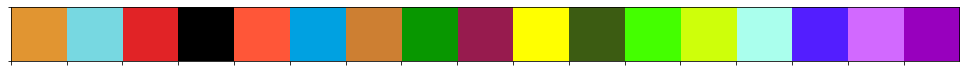

In [4]:
colors = ['#E19531', '#77D8E1', '#E12326', '#000000', '#FF5638',  
          '#00A1E1', '#CD7F32', '#089700', '#971B4E', '#FFFF00',
          '#3C5C12', '#44FF00', '#CEFF0A', '#AAFFED', '#531EFF',
          '#D269FF', '#9800BE']
sns.set_palette(sns.color_palette(colors))
sns.palplot(sns.color_palette(colors))

In [5]:
df_gdp = pd.read_csv(path_gdp_nominal, low_memory=False)
df_gdp = df_gdp.drop(['Country Code'], axis=1)
index_ru = df_gdp[df_gdp['Country Name'] == 'Russian Federation'].index
index_eu = df_gdp[df_gdp['Country Name'] == 'European Union'].index
index_wr = df_gdp[df_gdp['Country Name'] == 'World'].index
df_gdp = df_gdp.drop(index=[index_ru[0],index_eu[0], index_wr[0]], axis=0)
df_gdp

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Armenia,1.468317e+09,1.596969e+09,1.639492e+09,1.893726e+09,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,...,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.245794e+10,1.367280e+10
1,Azerbaijan,3.052468e+09,3.176703e+09,3.962735e+09,4.446370e+09,4.581247e+09,5.272617e+09,5.707720e+09,6.235857e+09,7.276013e+09,...,5.290270e+10,6.595163e+10,6.968394e+10,7.416444e+10,7.524429e+10,5.307437e+10,3.786752e+10,4.086556e+10,4.711294e+10,4.804765e+10
2,Belarus,1.397268e+10,1.475685e+10,1.412841e+10,1.522201e+10,1.213849e+10,1.273686e+10,1.235482e+10,1.459425e+10,1.782779e+10,...,5.722249e+10,6.175779e+10,6.568510e+10,7.552798e+10,7.881384e+10,5.645473e+10,4.772266e+10,5.472660e+10,6.003126e+10,6.308046e+10
3,Estonia,4.497824e+09,4.780170e+09,5.147711e+09,5.665917e+09,5.762048e+09,5.694070e+09,6.259258e+09,7.372457e+09,9.877637e+09,...,1.969361e+10,2.339153e+10,2.319271e+10,2.527141e+10,2.677347e+10,2.304886e+10,2.399645e+10,2.685910e+10,3.074716e+10,3.138695e+10
4,Georgia,2.693732e+09,3.094935e+09,3.510520e+09,3.613498e+09,2.800026e+09,3.057475e+09,3.219489e+09,3.395728e+09,3.991285e+09,...,1.224351e+10,1.510744e+10,1.648840e+10,1.718955e+10,1.762700e+10,1.495395e+10,1.514176e+10,1.624292e+10,1.759970e+10,1.774320e+10
5,Kazakhstan,2.037431e+10,2.103536e+10,2.216593e+10,2.213525e+10,1.687082e+10,1.829199e+10,2.215269e+10,2.463659e+10,3.083370e+10,...,1.480000e+11,1.930000e+11,2.080000e+11,2.370000e+11,2.210000e+11,1.840000e+11,1.370000e+11,1.670000e+11,1.790000e+11,1.800000e+11
6,Kyrgyz Republic,1.661019e+09,1.827571e+09,1.767864e+09,1.645964e+09,1.249061e+09,1.369688e+09,1.525116e+09,1.605643e+09,1.919008e+09,...,4.794358e+09,6.197766e+09,6.605140e+09,7.335028e+09,7.468097e+09,6.678178e+09,6.813092e+09,7.702935e+09,8.271109e+09,8.454620e+09
7,Lithuania,7.870782e+09,8.385109e+09,1.012027e+10,1.124036e+10,1.097288e+10,1.153921e+10,1.225250e+10,1.427836e+10,1.880258e+10,...,3.703446e+10,4.346613e+10,4.284254e+10,4.644206e+10,4.852600e+10,4.139240e+10,4.302197e+10,4.775091e+10,5.345517e+10,5.421932e+10
8,Latvia,5.770516e+09,5.952007e+09,6.508472e+09,7.145882e+09,7.518045e+09,7.934206e+09,8.334748e+09,9.529949e+09,1.173170e+10,...,2.380391e+10,2.849070e+10,2.817663e+10,3.027257e+10,3.138278e+10,2.709002e+10,2.773414e+10,3.027301e+10,3.431387e+10,3.411720e+10
9,Moldova,1.752980e+09,1.695122e+09,1.930081e+09,1.698718e+09,1.170783e+09,1.288429e+09,1.480674e+09,1.661818e+09,1.980907e+09,...,6.974960e+09,8.414361e+09,8.709165e+09,9.496685e+09,9.510219e+09,7.745232e+09,8.071481e+09,9.669760e+09,1.145741e+10,1.195544e+10


**GDP** at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

In [6]:
df_gdp = df_gdp.melt(id_vars=['Country Name'], var_name='year', value_name='GDP')
df_gdp['GDP'] = df_gdp['GDP'] / 1000000

[]

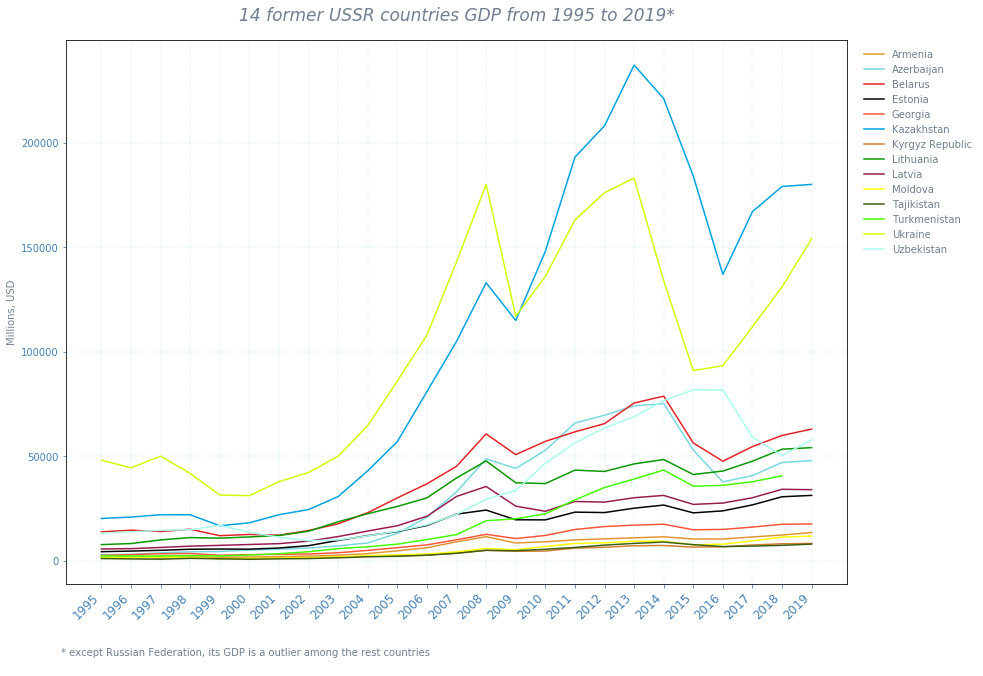

In [7]:
plt.figure(figsize=(14,10))
gdp = sns.lineplot(x='year', y='GDP', hue='Country Name', data=df_gdp)

for item in gdp.get_xticklabels():
    item.set_rotation(45)    
plt.xticks(ha='right',fontweight='light',fontsize='large')

handles, labels = gdp.get_legend_handles_labels()
legend = gdp.legend(handles=handles[1:], labels=labels[1:],bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False)
for text in legend.get_texts():
    text.set_color('slategrey')


plt.title(f'14 former USSR countries GDP from 1995 to 2019*',fontsize=17,fontstyle='italic', color='slategrey', y=1.025)
plt.ylabel("Millions, USD")
plt.xlabel(None)

gdp.yaxis.grid(linestyle='--', linewidth='0.2', color='skyblue')
gdp.xaxis.grid(linestyle='--', linewidth='0.2', color='skyblue')
gdp.tick_params(axis='x', colors='steelblue')
gdp.tick_params(axis='y', colors='steelblue')
gdp.yaxis.label.set_color('slategrey')
matplotlib.rc('axes',edgecolor='slategrey')

plt.figtext(.12, .01,("\n"*4) +  """* except Russian Federation, its GDP is a outlier among the rest countries\n""", color='slategrey', weight='light' ) 
gdp.plot()

**Insight**: *Kazakhstan and Ukrainian GDP outlying from other countries. Belarus reached third place (outranked Uzbekistan after 2017) in 2019, but Lithuania is still nearby despite the quite big population differences. Remaining Baltic states are also catching Belarus. Other former USSR countries(except Russian Federation) are at the bottom.*

In [8]:
df_gdp_pc = pd.read_csv(path_gdp_per_capita, low_memory=False)
df_gdp_pc = df_gdp_pc.drop(['Country Code'], axis=1)
df_gdp_pc = df_gdp_pc.melt(id_vars=['Country Name'], var_name='year', value_name='GDP')
df_gdp_pc

,Country Name,year,GDP
0,Armenia,1995,456.375049
1,Azerbaijan,1995,397.198116
2,Belarus,1995,1370.676559
3,Estonia,1995,3130.807094
4,Georgia,1995,578.336763
...,...,...,...
420,Ukraine,2019,3659.031312
421,Uzbekistan,2019,1724.841134
422,Russian Federation,2019,11584.995380
423,European Union,2019,35460.250430


**GDP per capita** is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

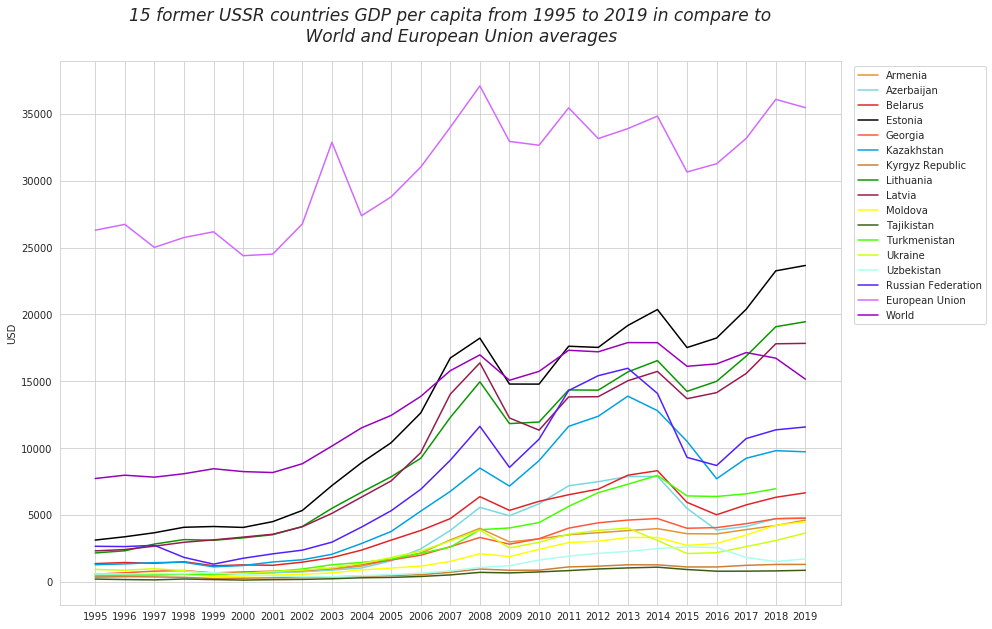

In [9]:
with sns.axes_style('whitegrid'):  
    plt.figure(figsize=(14,10))
    df_gdp_per_capita = sns.lineplot(x='year', y='GDP', hue='Country Name', data=df_gdp_pc)
    handles, labels = df_gdp_per_capita.get_legend_handles_labels()
    plt.xlabel(None)
    plt.ylabel("USD")
    plt.title('''15 former USSR countries GDP per capita from 1995 to 2019 in compare to
    World and European Union averages''',fontsize=17,fontstyle='italic', y=1.025)
    plt.legend(handles=handles[1:], labels=labels[1:],bbox_to_anchor=(1.01, 1), loc='upper left', edgecolor=None)

**Insight**: *Here we can easily notice that the EU average GDP per capita is several two times above former USSR countries. 3 Baltic states(Estonia-Lithuania-Latvia)that entered the EU in 2004, settling quite a bit lower. All the rest 12 former USSR countries, of course including Belarus, are even lower than the World average GDP per capita.*

In [10]:
df_gdp_ppp = pd.read_csv(path_gdp_ppp, low_memory=False)
df_gdp_ppp = df_gdp_ppp.drop(['Country Code'], axis=1).set_index('Country Name')
df_gdp_ppp_pc = pd.read_csv(path_gdp_ppp_per_employed, low_memory=False)
df_gdp_ppp_pc = df_gdp_ppp_pc.drop(['Country Code'], axis=1).set_index('Country Name')

In [11]:
def percentage_dimension(source):
    stack_for_diff = []
    data = list(df_gdp_ppp.loc[source, :])
    for i in range(1,len(df_gdp_ppp.loc[source,:])):
        stack_for_diff.append((data[i] / data[i-1]))
    return stack_for_diff

In [12]:
def gdppp_95_04(source=list):
    gdppp_by_95_04 = source[0:9].copy()
    return round((sum(gdppp_by_95_04) / len(gdppp_by_95_04) - 1) * 100, 2)


def gdppp_05_19(source=list):
    gdppp_by_05_19 = source[9:].copy()
    return round((sum(gdppp_by_05_19) / len(gdppp_by_05_19) - 1) * 100, 2)

In [13]:
def country_gdp_ppp_95_04():
    countries = list(df_gdp_ppp.index)
    countries_stack = []
    for country in countries:
        country_gdp = gdppp_95_04(percentage_dimension(country))
        countries_stack.append(country_gdp)
    return countries_stack


def country_gdp_ppp_05_19():
    countries = list(df_gdp_ppp.index)
    countries_stack = []
    for country in countries:
        if country == 'Turkmenistan':
            country_gdp = gdppp_05_19(percentage_dimension(country)[0:-2]) # no Turkmenistan data in 2019
            countries_stack.append(country_gdp)
        else:
            country_gdp = gdppp_05_19(percentage_dimension(country)[0:-1])
            countries_stack.append(country_gdp)
    return countries_stack  


print(country_gdp_ppp_95_04())
print(country_gdp_ppp_05_19())

[10.12, 10.28, 8.65, 8.87, 8.27, 8.12, 7.24, 8.35, 8.18, 3.66, 6.85, 6.07, 4.91, 6.29, 6.7, 0.51, 4.9]
[7.89, 9.81, 5.99, 6.74, 8.39, 7.05, 7.66, 6.24, 5.81, 7.37, 7.93, 10.08, 4.26, 7.72, 8.16, 3.45, 5.49]


In [14]:
df_gdp_ppp['1995-2004'] = country_gdp_ppp_95_04()
df_gdp_ppp['2005-2019'] = country_gdp_ppp_05_19()
df_gdp_ppp_final = df_gdp_ppp.loc[:,['1995-2004','2005-2019']]
df_gdp_ppp_final

,1995-2004,2005-2019
Country Name,,
Armenia,10.12,8.00
Azerbaijan,10.28,9.38
Belarus,8.65,5.81
Estonia,8.87,6.77
Georgia,8.27,8.30
Kazakhstan,8.12,7.00
Kyrgyz Republic,7.24,7.57
Lithuania,8.35,6.23
Latvia,8.18,5.71


**GDP PPP** indicator provides values for gross domestic product (GDP) expressed in current international dollars, converted by purchasing power parity (PPP) conversion factor.  GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. PPP conversion factor is a spatial price deflator and currency converter that eliminates the effects of the differences in price levels between countries.

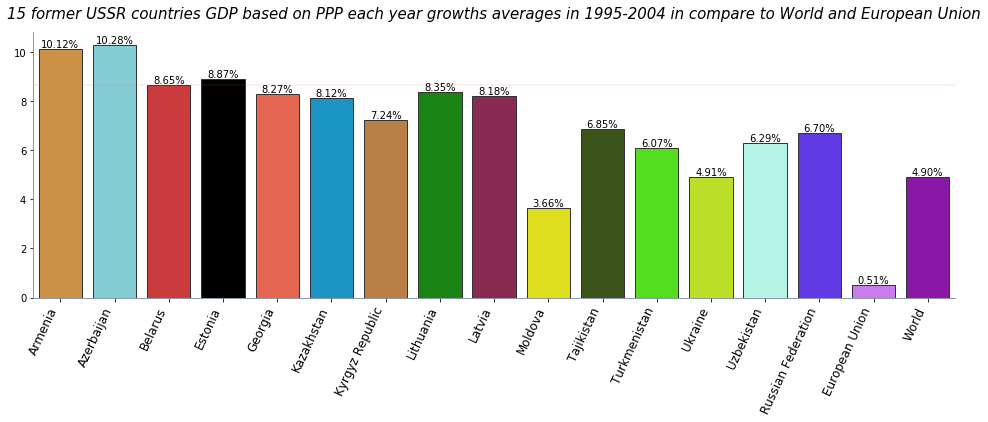

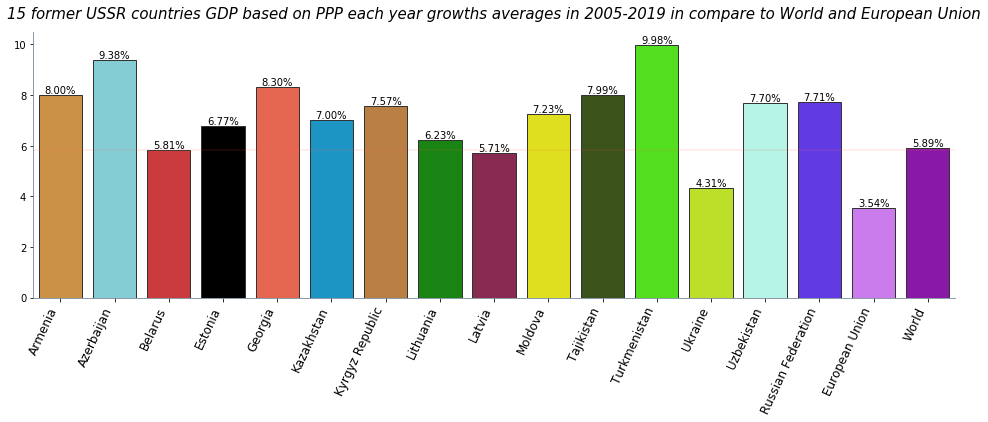

In [15]:
def plot_gdp(source,data, value, indicator):
    plt.figure(figsize=(15,6))
    gdp_ppp_plot = sns.barplot(x = source.index, y = source[data], edgecolor=".2")
    for item in gdp_ppp_plot.get_xticklabels():
        item.set_rotation(65)
    plt.xticks(ha='right',fontweight='light',fontsize='large')
    [plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
    for a in gdp_ppp_plot.patches:
        gdp_ppp_plot.annotate('{:.2f}'.format(a.get_height()) + value, (a.get_x()+0.4, a.get_height()),
                              ha='center', va='bottom', color= 'black') 
    gdp_ppp_plot.axhline(y = source.loc['Belarus',data], zorder=1, linewidth=0.2, color='tomato')
    plt.xlabel(None)    
    plt.ylabel(None)
    plt.title(f'15 former USSR countries GDP based on {indicator} in {data}'
              f' in compare to World and European Union',fontsize=15,fontstyle='italic', y=1.03)
    plt.tight_layout()

    
plot_gdp(df_gdp_ppp_final, '1995-2004', '%', 'PPP each year growths averages')
plot_gdp(df_gdp_ppp_final, '2005-2019', '%', 'PPP each year growths averages')

**Insight**: *We can combine two bar plots, that shows us how many percent GDP based on PPP per capita in each of former USSR country (in compare to EU and World averages) averagely grew each year.From 1995 till 2004 Armenia and Azerbaijan are the leaders, other countries are mostly in the same rate, from 6 till 9 (except moldova and Ukraine). EU indicators were imperturbable stable. From 2005 Turkmenistan took the lead. The Belarus is quite similar to the World's percentage but lost this distance to Estonia and Lithuania, which integrated into the European Union along with Latvia in 2004.*

In [16]:
def average_calc_list(source):
    stack_for_avg = []
    for country in source:
        country_avg = df_gdp_ppp_pc.apply(lambda x: x[country].mean(), axis=0).mean()
        stack_for_avg.append(country_avg)
    return stack_for_avg


df_gdp_ppp_pc['1994-2015'] = average_calc_list(list(df_gdp_ppp_pc.index))
average_gdp_ppp_pc = df_gdp_ppp_pc[['1994-2015']]
average_gdp_ppp_pc.head()

,1994-2015
Country Name,
Armenia,6727.986230
Azerbaijan,9745.595762
Belarus,11985.249706
Estonia,19918.219052
Georgia,7193.356233


**GDP PPP per capita** indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. Conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries. Total population is a mid-year population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.

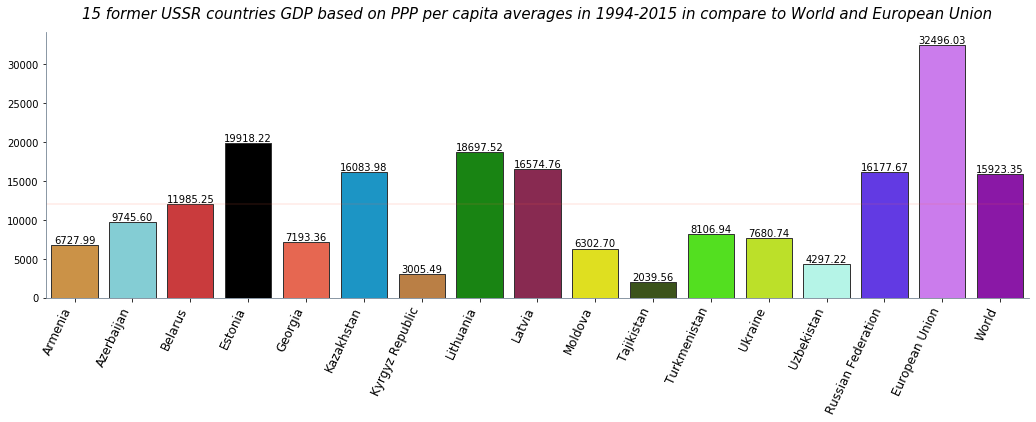

In [17]:
plot_gdp(average_gdp_ppp_pc , '1994-2015', '','PPP per capita averages')

**Insight**: *Absolute outlier is the EU in GDP based on PPP per capita averages from 1994 to 2015. We can see how the same indicator, but adding a 'per capita' modifier, shows us the current situation: Baltic states outranks even Kazakhstan and Russian Federation (both are rich in raw materials and minerals). Here we can clearly derive the fact that Lithuania, Latvia and Estonia won't achieve (as the Belarus indexes are quite lower despite the fact that economically it was at very quite the same level as Lithuania and Latvia just after the collapse of USSR) these positions if they did not enter EU in 2014.*

In [18]:
df_gdp_gini = pd.read_csv(path_gini, low_memory=False)
df_gdp_gini = df_gdp_gini.drop(['Country Name'], axis=1)

In [19]:
df = df_gdp_gini.loc[:,['Country Code','2005','2010','2015']]
df = df.drop(index=[1,10,11,13])
df.tail(5)

,Country Code,2005,2010,2015
9,MDA,36.300000,32.100000,27.000000
12,UKR,29.000000,24.800000,25.500000
14,RUS,41.300000,39.500000,37.700000
15,EUU,31.500000,31.248148,31.803571
16,WLD,39.173333,36.538554,36.813750


**Gini index** measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

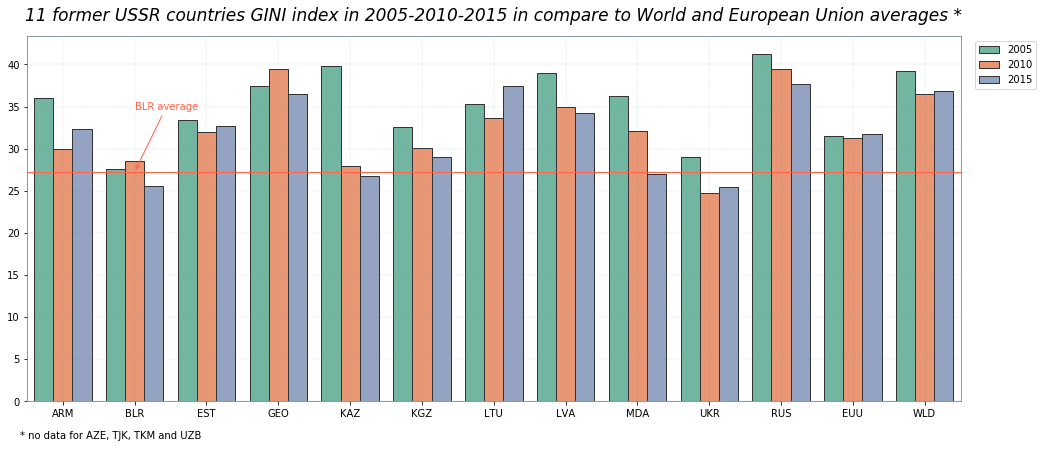

In [20]:
gini_melt = pd.melt(df, id_vars='Country Code')
plt.figure(figsize=(15,6))
df_gini = sns.barplot(x='Country Code', y='value', hue='variable', data=gini_melt, palette="Set2", edgecolor=".2")
by_avg = gini_melt[gini_melt['Country Code'] == 'BLR'].value.mean()


handles, labels = df_gini.get_legend_handles_labels()
plt.xlabel(None)
plt.ylabel(None)
plt.title('''11 former USSR countries GINI index in 2005-2010-2015 in compare to World and European Union averages *''',fontsize=17,fontstyle='italic', y=1.025)
plt.legend(handles=handles[:], labels=labels[:],bbox_to_anchor=(1.01, 1), loc='upper left', edgecolor=None)
df_gini.yaxis.grid(linestyle='--', linewidth='0.15', color='cadetblue')
df_gini.xaxis.grid(linestyle='--', linewidth='0.15', color='cadetblue')
df_gini.axhline(y = by_avg, zorder=5, linewidth=1, color='tomato', label="BLR Average")
plt.figtext(.05, -.05,("\n"*4) +  """* no data for AZE, TJK, TKM and UZB\n""", color='black', weight='light' ) 
df_gini.annotate(('BLR average'), 
                 xy=(1, by_avg),
                 xytext=(1, gini_melt.iloc[1,2]+7),
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'tomato'), color = 'tomato')
plt.tight_layout()


**Insight**: *The Belarus GINI index/coefficient is one of the lowest among all other countries through 2005-2010-2015. It shows that inequality level is low here, as the Gini coefficient measures the spread of households incomes across all households. On the other hand it can indicate that the entrepreneurship situation in the country is controlled by the government. We will look through further graphs to prove this point of view.*

In [21]:
df_fer = pd.read_csv(path_fer, low_memory=False)
df_fer = df_fer.drop(['Country Code'], axis=1).set_index('Country Name')
df_fer = df_fer.drop(index=['Russian Federation','European Union', 'World', 'Kazakhstan', 'Ukraine', 'Uzbekistan'])
df_fer.head(5)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,111182285.2,168201671.1,239225950.4,293162998.7,303511811.2,314200332.8,329632780.1,4.309743e+08,5.019771e+08,5.477589e+08,...,1.865824e+09,1.932472e+09,1.799374e+09,2.251610e+09,1.489443e+09,1.775293e+09,2.204114e+09,2.314114e+09,2.259322e+09,2.849645e+09
Azerbaijan,120884190.9,213661231.4,467319243.5,448540667.5,672589591.9,679605504.1,724979353.9,7.204718e+08,8.028397e+08,1.075084e+09,...,6.409060e+09,1.027393e+10,1.127735e+10,1.517567e+10,1.581642e+10,7.319394e+09,6.573863e+09,6.680532e+09,6.665990e+09,7.042997e+09
Belarus,377020387.9,469150024.1,393699160.8,702756649.1,294270277.3,350495841.3,390676493.5,6.873613e+08,6.365389e+08,8.369746e+08,...,5.025441e+09,7.863286e+09,8.094993e+09,6.654217e+09,5.067715e+09,4.172797e+09,4.907608e+09,7.315237e+09,7.157560e+09,9.393817e+09
Estonia,583006266.3,639770386.8,760039371.1,812906422.6,855813709.2,922839655.6,822453577.6,1.003157e+09,1.376699e+09,1.791730e+09,...,2.567138e+09,2.071157e+08,3.006598e+08,3.144061e+08,4.368330e+08,4.147984e+08,3.521407e+08,3.450365e+08,7.550056e+08,1.426439e+09
Georgia,198511607.0,191373447.2,201708671.4,132881224.2,144363950.6,115965903.6,161941585.5,2.021761e+08,1.961980e+08,3.866764e+08,...,2.263795e+09,2.818191e+09,2.872949e+09,2.823384e+09,2.699169e+09,2.520721e+09,2.756384e+09,3.038762e+09,3.289464e+09,3.505823e+09


Total **Foreign Exchange Reserves** comprise holdings of monetary gold, special drawing rights, reserves of IMF members held by the IMF, and holdings of foreign exchange under the control of monetary authorities. The gold component of these reserves is valued at year-end (December 31) London prices. Data are in current U.S. dollars.

In [22]:
year_list = list(df_fer.columns)
for year in year_list:
    df_fer[year] = df_fer[year] / 1000000

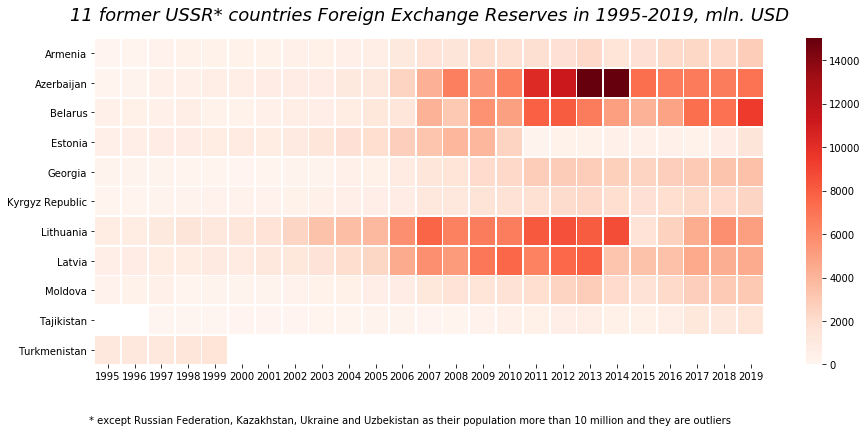

In [23]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_fer, annot=False, robust=False,cmap='Reds', linewidths=.8, ax=ax, vmin=0, vmax=15000)
plt.ylabel(None)
plt.title('''11 former USSR* countries Foreign Exchange Reserves in 1995-2019, mln. USD''',fontsize=18,fontstyle='italic', pad=18)
plt.figtext(.12, -.01,("\n"*2) +  """* except Russian Federation, Kazakhstan, Ukraine and Uzbekistan as their population more than 10 million and they are outliers""", color='black', weight='light' ) 
plt.show()

**Insight**: *We can infer that all countries are quite close at this economic metric, maybe we can notice a slight rise for all Baltic states in 2005-2006. On the other hand, belarus started raising Foreign Exchange Reserves in the past years. High Foreign Exchange Reserves is not always a good point - it is more common for developing countries as it helps to keep their currency stable.*

In [24]:
df_ir = pd.read_csv(path_ir, low_memory=False)
df_ir = df_ir.drop(['Country Code'], axis=1).set_index('Country Name')

In [25]:
df_ir = df_ir.loc[:,['2000','2005','2010','2015','2016','2017','2018','2019']]
df_ir = df_ir.drop(['Tajikistan', 'Turkmenistan', 'Uzbekistan'])
df_ir = df_ir.round(2)
df_ir

,2000,2005,2010,2015,2016,2017,2018,2019
Country Name,,,,,,,,
Armenia,-0.79,0.64,8.18,3.73,-1.40,0.97,2.52,1.44
Azerbaijan,1.81,9.68,5.73,4.01,12.45,12.94,2.26,2.61
Belarus,168.62,10.34,7.74,13.53,11.84,6.03,4.87,5.60
Estonia,4.02,4.08,2.97,-0.49,0.15,3.42,3.44,2.28
Georgia,4.06,8.25,7.11,4.00,2.13,6.04,2.62,4.85
Kazakhstan,NaN,NaN,NaN,6.67,14.55,7.44,6.02,5.25
Kyrgyz Republic,18.70,4.34,7.97,6.50,0.39,3.18,1.54,1.13
Lithuania,0.98,2.66,1.32,-0.88,0.91,3.72,2.70,2.33
Latvia,2.65,6.75,-1.08,0.17,0.14,2.93,2.53,2.81


**Inflation** as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

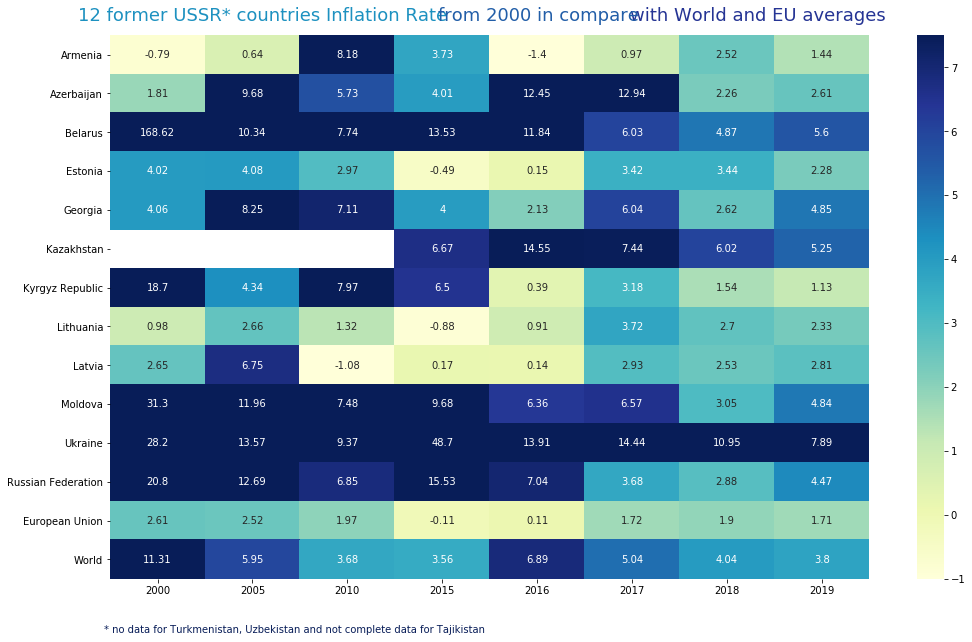

In [26]:
f, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(df_ir, annot=True, robust=False,cmap='YlGnBu', ax=ax, fmt='g', vmin= -1, vmax=7.5)
plt.ylabel(None)
plt.figtext(.12, .05,("\n"*2) +  """* no data for Turkmenistan, Uzbekistan and not complete data for Tajikistan""", color='#081d58', weight='light' ) 
plt.figtext(0.40, 0.9, '12 former USSR* countries Inflation Rate', fontsize=18, color='#1d91c0', ha ='right')
plt.figtext(0.55, 0.9, 'with World and EU averages', fontsize=18, color='#253494', ha ='left')
plt.figtext(0.475, 0.9, 'from 2000 in compare', fontsize=18, color='#225ea8', ha ='center')
plt.show()

**Insight**: *Several former USSR countries inflation rate became stable, but Belarus inflation rate, along with Ukraine, is one of the highest among all once brotherly-bordered countries.*

In [27]:
df_cpi = pd.read_csv(path_cpi, low_memory=False)
df_cpi = df_cpi.drop(['Country Code'], axis=1)
df_cpi

,Country Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Armenia,NaN,2.50000,2.500000,NaN,NaN,3.000000,3.100000,2.900000,2.900000,3.000000,2.900000,2.700000,2.600000,2.630000,34.000000,36.000000,37.000000,35.000000
1,Azerbaijan,NaN,1.70000,1.500000,2.000000,2.000000,1.800000,1.900000,2.200000,2.400000,2.100000,1.900000,2.300000,2.400000,2.380000,27.000000,28.000000,29.000000,29.000000
2,Belarus,3.900000,3.40000,4.100000,NaN,4.800000,4.200000,3.300000,2.600000,2.100000,2.100000,2.000000,2.400000,2.500000,2.420000,31.000000,29.000000,31.000000,32.000000
3,Estonia,5.700000,5.70000,5.700000,5.600000,5.600000,5.500000,6.000000,6.400000,6.700000,6.500000,6.600000,6.600000,6.500000,6.350000,64.000000,68.000000,69.000000,70.000000
4,Georgia,NaN,2.30000,NaN,NaN,2.400000,1.800000,2.000000,2.300000,2.800000,3.400000,3.900000,4.100000,3.800000,4.130000,52.000000,49.000000,52.000000,52.000000
5,Kazakhstan,NaN,2.30000,3.000000,2.700000,2.300000,2.400000,2.200000,2.600000,2.600000,2.100000,2.200000,2.700000,2.900000,2.690000,28.000000,26.000000,29.000000,28.000000
6,Kyrgyz Republic,NaN,2.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lithuania,NaN,3.80000,4.100000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,4.800000,4.600000,4.900000,5.000000,4.750000,54.000000,57.000000,58.000000,61.000000
8,Latvia,2.700000,3.40000,3.400000,3.400000,3.700000,3.800000,4.000000,4.200000,4.700000,4.800000,5.000000,4.500000,4.300000,4.190000,49.000000,53.000000,55.000000,55.000000
9,Moldova,NaN,2.60000,2.600000,3.100000,2.100000,2.400000,2.300000,2.900000,3.200000,NaN,2.900000,3.300000,2.900000,2.880000,36.000000,35.000000,35.000000,33.000000


**Corruption Perceptions Index** scores and ranks countries/territories based on how corrupt a country’s public sector is perceived to be by experts and business executives. It is a composite index, a combination of 13 surveys and assessments of corruption, collected by a variety of reputable institutions. The CPI is the most widely used indicator of corruption worldwide.

In [28]:
list_multiply_ten = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010', '2011']
df_cpi[list_multiply_ten] = df_cpi[list_multiply_ten] * 10
df_cpi = df_cpi.round(2)
df_cpi = pd.melt(df_cpi, id_vars='Country Name')

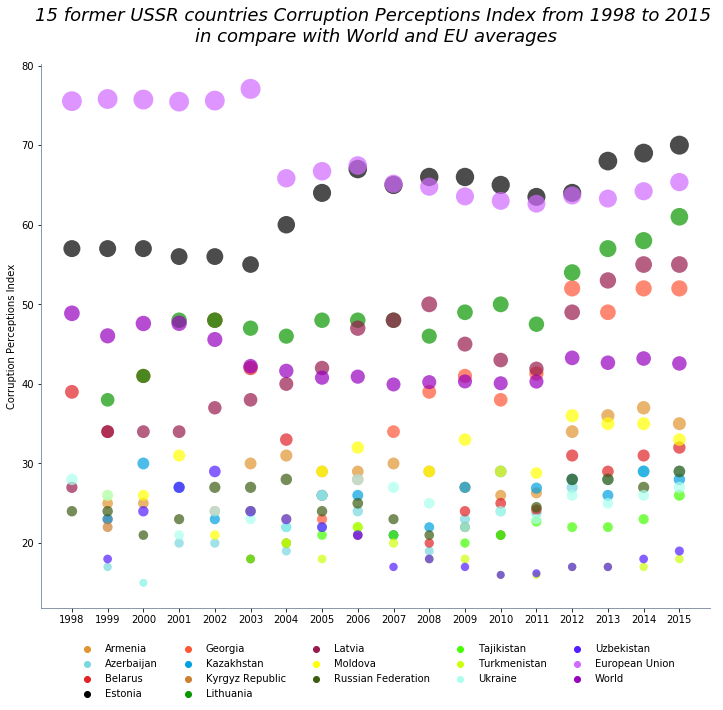

In [29]:
f, ax = plt.subplots(figsize=(12, 10))
df_cpi_plot = sns.scatterplot(x='variable',y='value',
                              hue = 'Country Name', size="value",
                              sizes=(60, 400), linewidth=0, alpha=.7,
                              data=df_cpi, ax=ax)
handles, labels = df_cpi_plot.get_legend_handles_labels()
plt.legend(handles=handles[1:18], labels=labels[1:18],bbox_to_anchor=(0.5, -0.05),fancybox=True, ncol=5, loc='upper center', edgecolor=None, frameon=False)
plt.xlabel(None)
plt.ylabel('Corruption Perceptions Index')
plt.title('''15 former USSR countries Corruption Perceptions Index from 1998 to 2015 
in compare with World and EU averages''',fontsize=18, fontstyle='italic', y=1.03)
sns.despine()

**Insight**: *According to World Bank databases the Belarus is not at the bottom of CPI rankings, where Uzbekistan, Tajikistan and Turkmenistan occur, but the Bellarusian CPI (average is ~ 31) is quite away from EU averages(~ 65) and Baltic states.*

In [30]:
df_unemployment = pd.read_csv(path_unemployment, low_memory=False)
df_unemployment = df_unemployment.drop(['Country Code'], axis=1).set_index('Country Name')
df_unemployment = df_unemployment.loc[:,['1995','1998','2002','2006','2010','2014','2018']].reset_index()
df_unemployment

,Country Name,1995,1998,2002,2006,2010,2014,2018
0,Armenia,6.700000,9.400000,NaN,NaN,19.007999,17.498501,18.965900
1,Azerbaijan,0.800000,1.130000,10.040000,6.620000,5.630000,4.910000,4.900000
2,Belarus,2.900000,2.300000,3.000000,1.200000,NaN,0.500000,4.760000
3,Estonia,9.659000,9.509800,10.026100,5.914700,16.707199,7.351800,5.366000
4,Georgia,NaN,14.530000,12.590000,13.570000,20.202700,17.438499,12.667000
5,Kazakhstan,10.980000,13.130000,9.330000,7.790000,5.770000,5.060000,4.850000
6,Kyrgyz Republic,NaN,NaN,12.550000,8.270000,8.640000,8.050000,4.537100
7,Lithuania,17.540001,13.711000,13.008000,5.780400,17.814100,10.698100,6.147100
8,Latvia,NaN,14.463500,13.828900,7.029700,19.482300,10.846300,7.412300
9,Moldova,NaN,NaN,6.800000,7.380000,7.446400,3.856400,4.112700


**Unemployment** refers to the share of the labor force that is without work but available for and seeking employment. Definitions of labor force and unemployment differ by country.

In [31]:
df_unemployment = pd.melt(df_unemployment, id_vars='Country Name')
df_unemployment.rename(columns = {'variable': 'Year', 'value': '%'}, inplace=True)

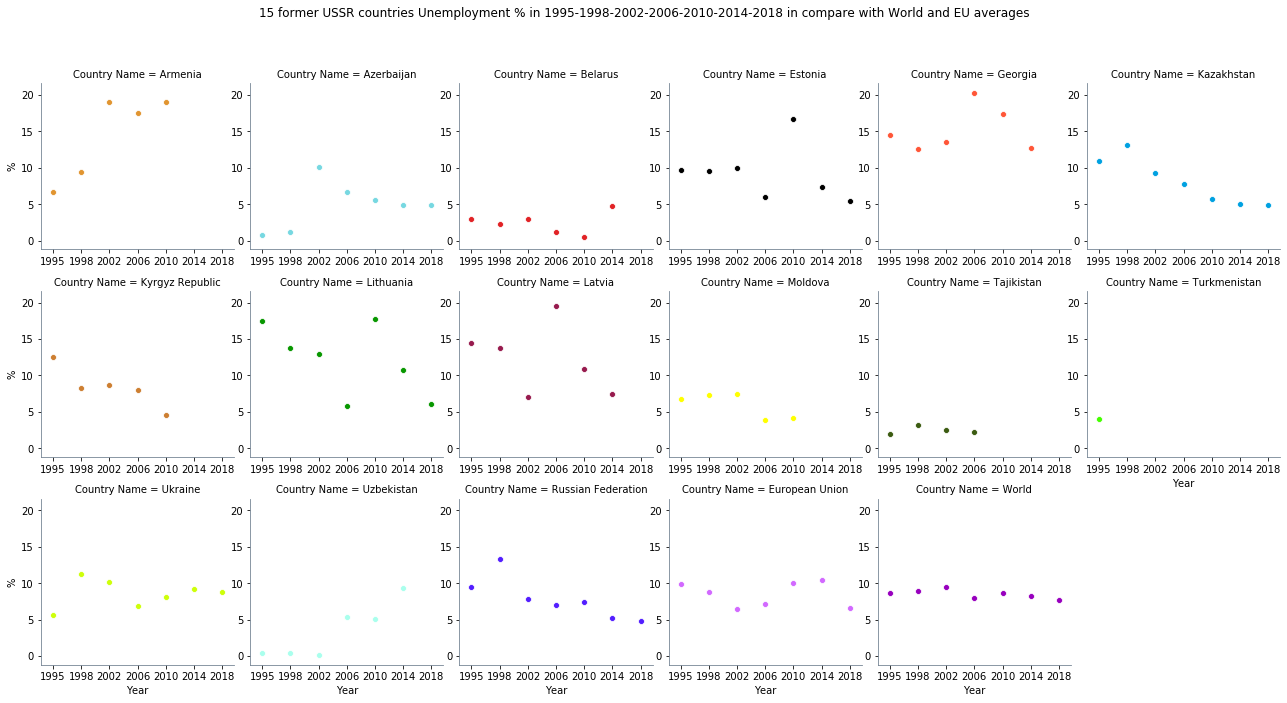

In [32]:
g = sns.FacetGrid(df_unemployment, col='Country Name', hue='Country Name', sharey=True,col_wrap=6)
g = g.map_dataframe(sns.scatterplot, 'Year','%') ## (!) MISTAKE !!!!
for ax in g.axes.flatten():
    ax.tick_params(labelleft=True, labelbottom=True)
plt.suptitle('''15 former USSR countries Unemployment % in 1995-1998-2002-2006-2010-2014-2018 in compare with World and EU averages''', y=1.08)
plt.show()

**Insight**: *Unemployment level in Belarus is very low (from 2011 till 2014 it was even above 1%) till 2016, when it raised above 5%. Normal unemployment rate in the absence of shocks to the economy is in a range between 3.5% and 4.5%. But despite the fact that there are enough working places in the country we cannot bindingly claim that all working places are economically sufficient as a lot of unmodernized postsoviet plants are still working according to annualy staged plans by the government.*

##########################################################################################################################

# Conclusion 
## still to go...

In [33]:
#df_unemployment = pd.read_csv(path_unemployment, low_memory=False)
#df_unemployment = df_unemployment.drop(['Country Code'], axis=1)#.set_index('Country Name')
#df_unemployment = df_unemployment.loc[:,['1995','1998','2002','2006','2010','2014','2018','Country Name']]
#df_unemployment = df_unemployment.T
#countires = list(df_unemployment.loc['Country Name',:])
#df_unemployment.columns = countires
#df_unemployment = df_unemployment.drop(['Country Name'], axis=0)
#df_means = pd.DataFrame(df_unemployment.mean()).rename(columns={0:'AVG unemployment rate, %'})
#df_means.round(2).sort_values(by='AVG unemployment rate, %',ascending=False)